<img src="https://raw.githubusercontent.com/stevenstillstraining/plotly/main/images/logo.png" width="300">

# Part 1: Introduction to Data Visualisation with Plotly
**first some house keeping** 
<by>lets check you have the right version of numpy. anything less that version 2.3 should be ok

In [109]:
import os # this will tell us where we are exporting out html files too
import pandas as pd
import numpy as np

In [91]:
print(np.__version__)
print(pd.__version__)

1.26.4
2.3.0


# Step 1 Load Data Frames

In [92]:
gas_fc_data = 'https://raw.githubusercontent.com/stevenstillstraining/plotly/main/Gas/Gas_FC.csv'
gas_vol_data = 'https://raw.githubusercontent.com/stevenstillstraining/plotly/main/Gas/Gas_Volume.csv'
power_fc_data = 'https://raw.githubusercontent.com/stevenstillstraining/plotly/main/Power/Power_FC.csv'
power_vol_data = 'https://raw.githubusercontent.com/stevenstillstraining/plotly/main/Power/Power_Volume.csv'

In [93]:
gas_fc = pd.read_csv(gas_fc_data)
gas_vol = pd.read_csv(gas_vol_data) 
power_fc = pd.read_csv(power_fc_data)
power_vol = pd.read_csv(power_vol_data)

In [94]:
gas_fc.head(2)

,Date,PRC
0,01/08/2025,82.73
1,01/09/2025,88.83


In [100]:
gas_vol.head(2)

,Date,Volume therms
0,Fri 01/08/25,4059.61
1,Sat 02/08/25,3354.20


In [96]:
power_fc.head(2)

,Date,bsld_prc,peak_prc
0,Fri 01/08/2025,74.58,76.58
1,Mon 01/09/2025,82.33,89.97


In [101]:
power_vol.head(2)

,Settlement_Day,Settlement_Period,Purchased_Volume,Actual_Demand,Hedged Volume
0,Fri 01/08/2025,1,46.12,46.52,49.21
1,Fri 01/08/2025,2,46.30,46.16,49.21


**can you remember how to load only the columns you want?**

In [98]:
gas_vol = gas_vol[["Date","Volume therms"]]

In [99]:
power_vol = power_vol[["Settlement_Day","Settlement_Period","Purchased_Volume","Actual_Demand","Hedged Volume"]]

# Step 2: Get them Visualised

First off why dont we just say "import Plotly" like we do with pandas

Plotly is a huge catalgue of sub libraries for different purposes. <BR>We'll go through plotly express and cover how to use the catalogue to build an express plot<br> You can try the more extreme outliers if they fit your needs:<br>[Plotly Catalogue](https://plotly.com/python/)


## ...Now Actually Get them Visualised

grab the introduction to plotly express code for scartter graphs and paste it below:<br>[Plotly Catalogue](https://plotly.com/python/)

In [102]:
import plotly.express as px

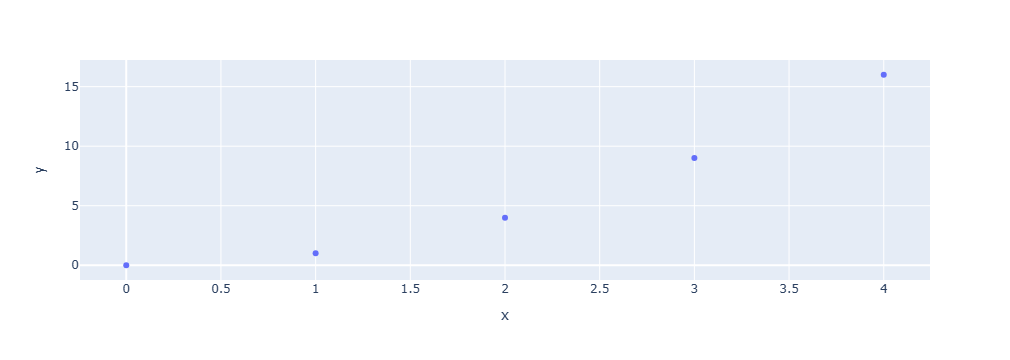

In [112]:
fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
fig.show()

There is probably a better graph type for us doing time series:

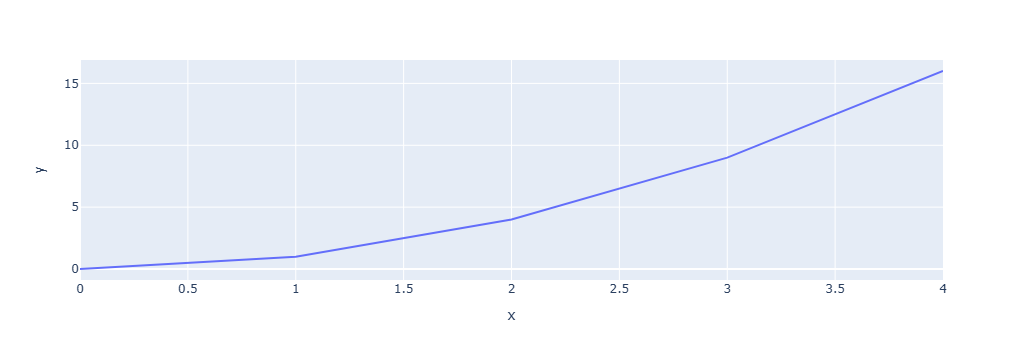

In [113]:
fig = px.line(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
fig.show()

Now we can add our data into this framework.<br> Heres the syntax to help:<br>
fig = px.line(**DATAFRAME**,x=**"COLUMN 1"**, y=**"COLUMN 2"**)
paste the introduction test details below to use the **gas_fc** data frame with the x axis being the date and the y axis the price


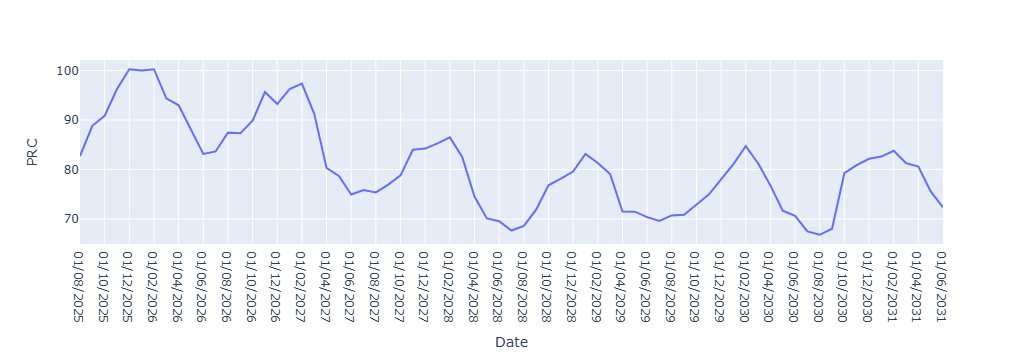

In [104]:
fig = px.line(gas_fc,x="Date", y="PRC")
fig.show()

Now do the same for the gas_volume data frame:

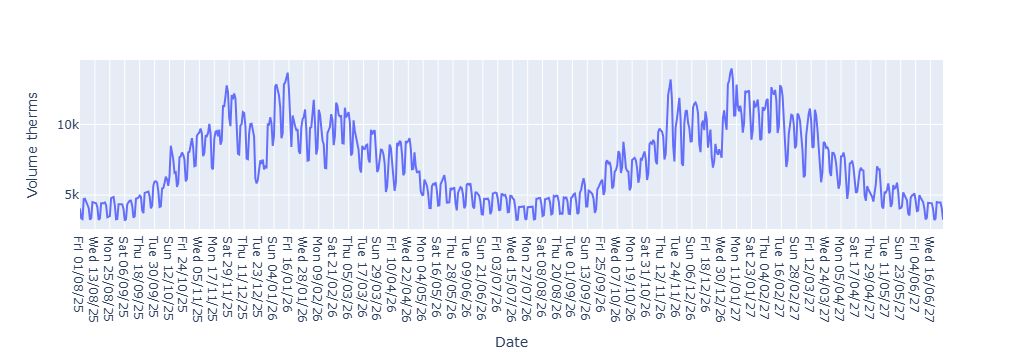

In [105]:
fig = px.line(gas_vol,x="Date", y="Volume therms")
fig.show()


Then lets use the catalogue to start adding more elements:<BR> **Add A title to your graph**

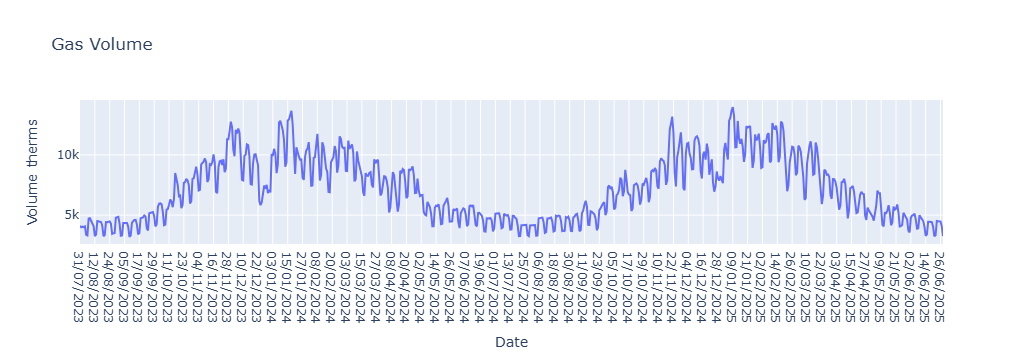

In [65]:
fig = px.line(gas_vol,x="Date", y="Volume therms",title="Gas Volume")
fig.show()

**Now center the title** <br>Theres a layout seciton in the library <br>https://plotly.com/python/reference/layout/


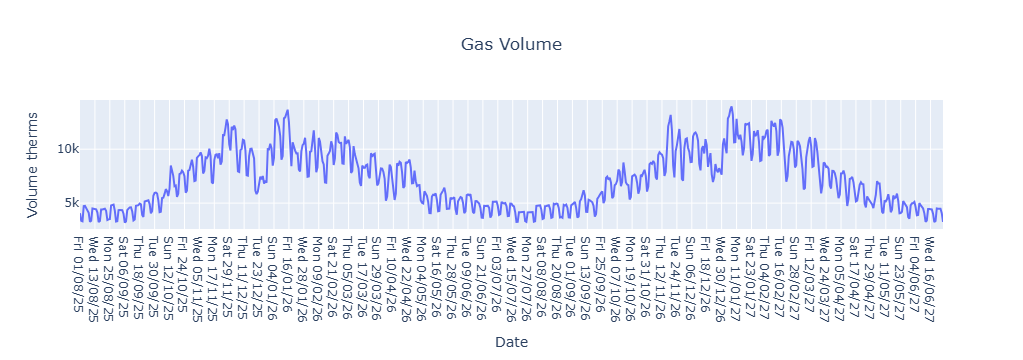

In [107]:
vol_fig = px.line(gas_vol,x="Date", y="Volume therms",title="Gas Volume")
vol_fig.update_layout(title_x=0.5)
vol_fig.show()

# Step 3: Exporting
remember the cool thing about plotly is the interactive html. so lets export before we go crazy on customisation.
<br>**Write intrustions for how to export any of your grpahs above into a html file:**

In [108]:
vol_fig.write_html("gas_vol.html")

So thats how we export to HTML, the file will now be in the same folder as your jupyter notebook script<br>  For bonus point we can talk about a quality of life inmprovement using os here 
<br>https://docs.python.org/3/library/os.path.html


In [115]:
# Set filename
filename = "gas_vol_.html"

# Get full path to where the file will be saved
full_path = os.path.abspath(filename)

# Export to HTML
vol_fig.write_html(full_path)

# Print the full file path
print(f"Exported to: {full_path}")


Exported to: C:\Users\steve\OneDrive\Personal Python Projects\Training\Plotly\gas_vol_.html


# Part 2: Maximum Effort Chart
In this section we'll look at some blocks of chart formatting, 
<br>comment up the script then when you understand it you can:
<br>- edit any formats you need
<br>- import your own dataframes in an plot what you need 

In [132]:
# unpivot power_vol data frame to plot
power_vol_unpivot = power_vol.melt(
    id_vars=["Settlement_Day", "Settlement_Period"],            # columns to keep
    value_vars=["Purchased_Volume", "Actual_Demand", "Hedged Volume"],  # columns to unpivot
    var_name="Type",    # new column of catagories
    value_name="Volume" # new column of values
)

In [137]:
power_vol_unpivot.head(2)

,Settlement_Day,Settlement_Period,Type,Volume
0,Fri 01/08/2025,1,Purchased_Volume,46.12
1,Fri 01/08/2025,2,Purchased_Volume,46.30


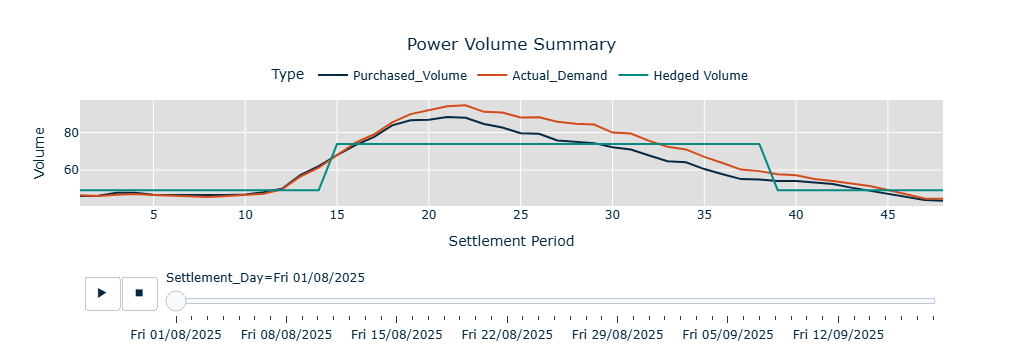

In [142]:
# Set custom colours (must match order in data)
colour_map = {
    "Purchased_Volume": "#062942",   # navy
    "Actual_Demand": "#d24b1c",      # orange
    "Hedged Volume": "#048a81"       # dark turquoise
}

# Create the figure
power_vol_fig = px.line(
    power_vol_unpivot,
    x="Settlement_Period",
    y="Volume",
    color="Type",
    animation_frame="Settlement_Day",
    color_discrete_map=colour_map,
    title="Power Volume Summary"
)

# Update layout (everything in one call)
power_vol_fig.update_layout(
    title={"x": 0.5, "font": {"color": "#062942"}},
    plot_bgcolor="#dfdfdf",
    paper_bgcolor="white",
    font={"color": "#062942"},
    legend={"orientation": "h","yanchor": "bottom","y": 1.1,"xanchor": "center","x": 0.5},
    xaxis={"title": "Settlement Period","gridcolor": "white"},
    yaxis={"title": "Volume","gridcolor": "white"}
)

power_vol_fig.show()


In [119]:
import os

# Set filename
filename = "power_vol.html"

# Get full path to where the file will be saved
full_path = os.path.abspath(filename)

# Export to HTML
power_vol_fig.write_html(full_path)

# Print the full file path
print(f"Exported to: {full_path}")


Exported to: C:\Users\steve\OneDrive\Personal Python Projects\Training\Plotly\power_vol.html
